# Breast Cancer Prediction Using MP Neuron Model
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hemendrarajawat/World-With-Deep-Learning/blob/master/MP%20Neuron%20Model%20-%20Breast%20Cancer%20Prediction.ipynb)

## First Artificial Neuron Model

### What is MP Neuron Model?

It is very well known that the most fundamental unit of deep neural networks is called an artificial neuron/perceptron. 
But the very first step towards the perceptron we use today was taken in 1943 by McCulloch and Pitts, by mimicking the functionality of a biological neuron.

#### Mathematical Formula for Perceptron Model:

$y = 1, \mbox{if } \sum_{i=0}^{n}x_i >= b$

$y = 0, \mbox{otherwise}$


### Where MP Neuron Model can be used?

1. When you have Binary Input Data
2. When you have Binary Output Data
3. Where you can afford Brute-Forte search to find the vaule of threshold paramenter i.e. b


Visit my GitHub Profile for more cool stuff: [Hemendra Singh Rajawat - GitHub](https://github.com/hemendrarajawat)

## Import Libaries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn.datasets
from tqdm import tqdm_notebook 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Load Data

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [0]:
df = pd.DataFrame(data=breast_cancer['data'], columns=breast_cancer['feature_names'])

In [0]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
df['target'] = breast_cancer.target

In [0]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
df.shape

(569, 31)

## Train-Test Split

In [0]:
X = df.drop(columns="target")

In [0]:
Y = df['target']

In [0]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10, stratify=Y)

In [0]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [0]:
print(Y.shape, Y_train.shape, Y_test.shape)

(569,) (455,) (114,)


In [0]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.6263736263736264 0.631578947368421


## Binarization of Data

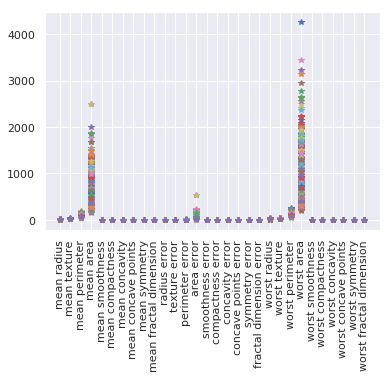

In [0]:
plt.plot(X_train.T, '*')
plt.xticks(rotation=90)
plt.show()

In [0]:
X_binarized_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

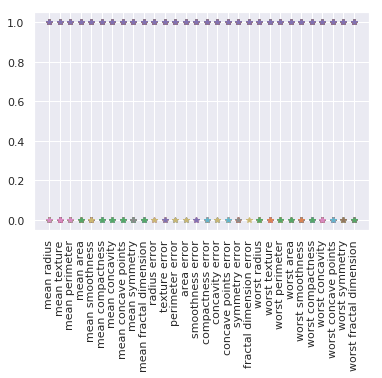

In [0]:
plt.plot(X_binarized_train.T, '*')
plt.xticks(rotation=90)
plt.show()

In [0]:
X_binarized_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

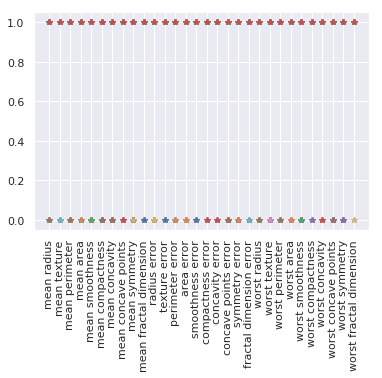

In [0]:
plt.plot(X_binarized_test.T, '*')
plt.xticks(rotation=90)
plt.show()

## Convert data into Numpy Array

In [0]:
X_binarized_train = X_binarized_train.values
X_binarized_test = X_binarized_test.values
Y_train = Y_train.values
Y_test = Y_test.values

## MP Neuron Class

In [0]:
class MPNeuron:
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return (1 if (sum(x) >= self.b) else 0)
    
  def predict(self, X):
    Y_pred = [self.model(x) for x in X]
    return np.array(Y_pred)

  def fit(self, X, Y):
    accuracy = {}
    
    for b in tqdm_notebook(range(X.shape[1]+1)):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
      
    best_b = max(accuracy, key=accuracy.get)
    self.b = best_b
    
    print('Optimal Value of b is', self.b, 'with accuracy of', accuracy[self.b])
      

## Training the Model

In [0]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarized_train, Y_train)


Optimal Value of b is 28 with accuracy of 0.8703296703296703


## Evaluating the Model

In [0]:
Y_test_pred = mp_neuron.predict(X_binarized_test)
print('Test Accuracy:' , accuracy_score(Y_test_pred, Y_test))

Test Accuracy: 0.7631578947368421


## Summary

* As MP Neuron is the basic fundamental unit of Deep Learning, the accuracy is not good
* In case of MP Neuron we need to do Brute-Force to learn the value of threshold parameter i.e. b in out case


There are too many best models out there to do the real world job. This module just give us quick push to the World of Deep Learning. 

